In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.datasets import load_breast_cancer 
from sklearn import decomposition, datasets
from sklearn.naive_bayes import GaussianNB
import os, sys
sys.path.append(r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\default')
sys.path.append(r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\default\External_Files')
#custom functions
import my_functions
from cf_matrix import make_confusion_matrix

In [15]:
workdir = r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\HW3_NaiveBayes'
data_dir = r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\default\DataSets'
graph_dir = r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\HW3_NaiveBayes\HW3_Graphs'
HW3_data = r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\HW3_NaiveBayes\HW3_Data'

In [16]:
df_c = pd.read_csv(data_dir + '/cancer.csv')


Problem 1 (40pts):

Use the cancer dataset to build a Naïve Bayesian model to classify the type of cancer (Malignant vs. benign). Plot your classification accuracy, precision, and recall over a different number of Ks. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in previous homework.

 

Problem 2 (40pts):

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Plot your classification accuracy, precision, and recall over a different number of Ks. Explain and elaborate on your results.

 

Problem 3 (20pts):

Can you repeat problem 3? This time, replace the Bayes classifier with logistic regression. Report your results (classification accuracy, precision, and recall). Compare your results against problem 2 and 3.


In [17]:
# Problem 1 Goal Plot 3 stats gathered from different iteratitons of K 
# - Need to be able to standardize the data 
# -We need to be able to do Naive bayes on a data set and return the accuracy percision and recall 
# - We need to be able to gather data on three different stats based on a changing K IE X --> Y1, Y2, Y3 
# - we Need to plot those four stats based on the changing K 
#
#
# Problem 2: Goal Plot 3 stats gathered from different iterations of K 
# - Need to be able to standardize the data 
#       function takes in a dataframe and returns a standardized dataframe *Have this* 
# - Need to be able to preform PCA on the data based on K and return it as a dataframe 
#       *CHECK* Function takes in a dataframe and a integer K (Dementions) and returns a dataframe 
# - we need to be able to preform Naive bayes on a  data set and return the accuracy percision and recall 
#       *CHECK* Function takes in a data frame and returns the accurracy percision and recall 
# - we need to be able to gather data on three different stats based on a changine K value 
#       Create a data frame with four columns K, accuracy, Percision and Recall
# - we need to plot those for stats based on the changing K 
#       *CHECK* Takes in a DataFrame, column index, Title, Path RETURNS: Nothing
#
#
# Problem 3: 
# - Need to be able to standardize the data 
# - Need to be able to preform PCA on the data based on K and return it as a dataframe 
# - we need to be able to preform Logistic Regression on a  data set and return the accuracy percision and recall 
# - we need to be able to gather data on three different stats based on a changine K value 
# - we need to plot those for stats based on the changing K 
# 

# Solution:
# Create a function that loops through the columns of the cancer data set and gets the accuracy, recall and percision then plts em 
# Input: DataFrame, Type of Model, PCA Y or N Returns: Nothing 

# Functions 

In [18]:
# PCA Function
# Required imports: decomposition, datasets
# INPUTS: DataFrame X values, K- The # of Dementions
def DemReduction(X, K):
    pca = decomposition.PCA(n_components=K)
    df_red = pca.fit_transform(X)
    return df_red

In [19]:
# Accuracy, Recall and Percision Func
# Required Imports: clasification_report 
# INPUTS: Y, Y_pred OUTPUTS: accuracy, Recall, Percision
def class_report( Y, Y_pred):
    results = classification_report(Y, Y_pred, output_dict=True)
    return results['accuracy'], results['macro avg']['recall'], results['macro avg']['precision']

In [20]:
# Naive Bayes Function 
# Required Imports: GaussianNB, train_test_split
# INPUTS: DataFrame X, Y Vals, Train/test split Default = 80/20, rand_state Default= 0 RETURNS accuracy, Persision, Recall 
def NaiveBayesFunc(X, Y, split= .2 , rand_state= 0):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split, random_state=rand_state)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    # Get accuracy, Perscion and Recall 
    return class_report(y_test, y_pred)


In [21]:
# Logistic Regression Function *NEW* 
# Required Imports: 
# INPUTS DataFrame X, Y Vals, Train/test split Default = 80/20, rand_state Default= 0 RETURNS accuracy, Persision, Recall 
def logisticReg(X, Y, split= .2 , rand_state= 0):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split, random_state=rand_state)
    logistic = LogisticRegression(random_state = rand_state)
    y_pred = logistic.fit(X_train, y_train).predict(X_test)
    # Get accuracy, Perscion and Recall 
    return class_report(y_test, y_pred)

In [22]:
# Graph Function 
# Requried Imports: matplotlib 
# INPUTS: DataFrame, column index, Title, Path RETURNS: Nothing
def plot_DataFrame(df, x_column, Title= 'Default', path= None):
    columns = list(df.columns)
    columns.remove(x_column)
    for column in columns:
        plt.plot(df[x_column],df[column], label = column)
    plt.title(Title)
    plt.grid()
    plt.xlabel('K Value')
    plt.legend()
    if path:
        plt.savefig(path + '/' + Title + '.jpg')
    plt.clf()


In [23]:
# Solution To the problem 
# Input: DataFrame, Type of Model, PCA Y or N Returns: Nothing 
def HW3_Solution(df, model_type= 'NaiveBayes', pca_on= True, label= 'Default'):
    # Create Nessasary Variables IE dataframe that holds the k values 
    template = {'K': [], 'accuracy': [], 'recall': [], 'percision': []}
    results = pd.DataFrame(template)
    temp = [0, 0, 0, 0] # K value, Accuracy, Recall, Percsision
    outcomeColumn = 'label'
    df_temp = pd.DataFrame()
    
    # Choose Model 
    if model_type == 'NaiveBayes': 
        model = NaiveBayesFunc
    else :
        model = logisticReg
    # Standardize Data 
    df = my_functions.clense_data(df,stand=True, classification=outcomeColumn)
    X = df.loc[:, df.columns != outcomeColumn ]
    Y = df.loc[:, df.columns == outcomeColumn]
    # loop for the amount features in the dataset 
    for i in range(len(X.columns)):
        temp[0] = i + 1
        if pca_on: 
            X_temp = DemReduction(X, i + 1)
            temp[1], temp[2], temp[3] = model(X_temp, Y)       
            
        else: 
            df_temp = pd.concat([df_temp,X[X.columns[i]]], axis=1)
            temp[1], temp[2], temp[3] = NaiveBayesFunc(df_temp, Y) 
        results.loc[len(results)] = temp
    # Plot the data 
    print(results.head())
    plot_DataFrame(results, x_column='K', Title= label, path=graph_dir)
    return

## Problem 1

In [24]:
# Create Vairables 
from unittest import result


template_p1 = { 'accuracy': [], 'recall': [], 'percision': []}
results_p1 = pd.DataFrame(template_p1)
df_p1 = my_functions.clense_data(df_c,stand=True, classification='label')
X_p1 = df_p1.loc[:, df_p1.columns != 'label' ]
Y_p1 = df_p1.loc[:, df_p1.columns == 'label']
bayes_results = [0,0,0]
log_results = [0,0,0]
# Results 
bayes_results[0], bayes_results[1], bayes_results[2]  = NaiveBayesFunc(X_p1, Y_p1)
log_results[0], log_results[1], log_results[2] = logisticReg(X_p1,Y_p1)
# append to data frame 
results_p1.loc[len(results_p1)] = bayes_results
results_p1.loc[len(results_p1)] = log_results 
print(results_p1)
test = [results_p1]
# send to excel 
my_functions.create_data_table(test, path= HW3_data)



   accuracy    recall  percision
0  0.903509  0.902032   0.899621
1  0.964912  0.963798   0.963798


c:\Users\noaht\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Problem 2 

In [25]:
HW3_Solution(df_c, pca_on = True, label= 'Problem 2 Graph')

c:\Users\noaht\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWa

     K  accuracy    recall  percision
0  1.0  0.903509  0.902032   0.899621
1  2.0  0.912281  0.909495   0.909495
2  3.0  0.903509  0.902032   0.899621
3  4.0  0.903509  0.902032   0.899621
4  5.0  0.921053  0.913782   0.923052


c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<Figure size 432x288 with 0 Axes>

## Problem 3

In [26]:
HW3_Solution(df_c, model_type= 'LogisticReg', pca_on = True, label= 'Problem 3 Graph')

c:\Users\noaht\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\noaht\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWa

     K  accuracy    recall  percision
0  1.0  0.903509  0.902032   0.899621
1  2.0  0.929825  0.933947   0.925303
2  3.0  0.912281  0.912671   0.908006
3  4.0  0.947368  0.945697   0.945697
4  5.0  0.956140  0.953160   0.956202


<Figure size 432x288 with 0 Axes>

# Display Graphs 

In [29]:
from PIL import Image
os.chdir(graph_dir)
graphs = os.listdir()

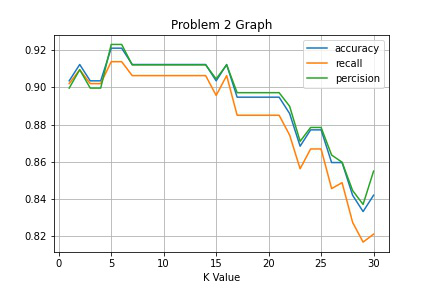

In [30]:
Image.open(graphs[0])

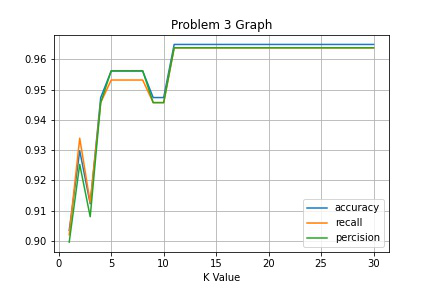

In [31]:
Image.open(graphs[1])